In [1]:
from solvers import Runge_Kutta as rk4
import matplotlib.pyplot as plt
import numpy as np

# El modelo *Integrate and Fire*

## Teoría

El modelo *Integrate and Fire* del comportamiento de una neurona viene descripto por dos ingredientes. En primer lugar, la ODE


\begin{align}
\frac{dV}{dt} &= f(V(t)) \\
              &= \frac{1}{\tau}\left( E - V(t) + RI(t) \right)
\end{align}


donde:

* $V(t)$ representa el potencial de membrana al tiempo $t$,
* $E \approx -65mV$ representa el potencial de reposo,
* $\tau \approx 10ms$ representa el tiempo de relajación,
* $R \approx 10M\Omega$ representa una resistencia eléctrica, y
* $I(t) \approx 1nA$ representa una corriente/señal de entrada.

En segundo lugar, un mecanismo de disparo definido por

$
V(t) \to E
$

cuando

$
V(t) > V_u
$

donde:

* $V_u \approx -50mV$ representa un potencial umbral.

Es decir, según el mecanismo de disparo, el potencial de membrana $V(t)$ se resetea a su valor de reposo $E$ si supera cierto valor umbral $V_u$.


In [2]:
interval = [0, 100] #mili seconds
V_0 = 10
tao = 10
E = -65
R = 10

Caso corriente externa $I(t) = 0nA$ 

y corriente externa $I(t) = 2nA$

In [3]:
fun = lambda x, t, p: 1/p[0] * (p[1] - x + p[2]*(p[3](t)))

I = lambda t: 0
p = [tao, E, R, I]

solution_I0 = rk4(fun=fun,
               interval=interval,
                x_0=V_0,
                h=1,
                p=p)

I = lambda t: 2
p = [tao, E, R, I]

solution_I2 = rk4(fun=fun,
               interval=interval,
                x_0=V_0,
                h=1,
                p=p)

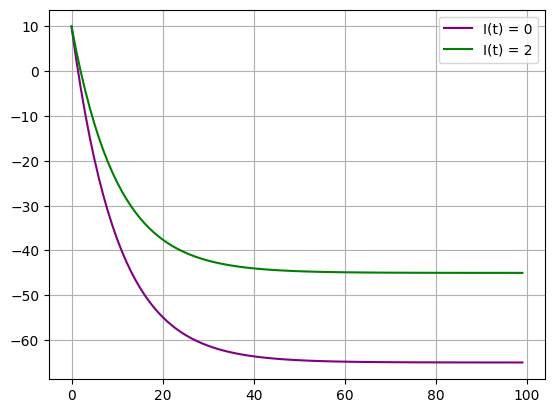

In [4]:
fig, ax = plt.subplots(1,1)

ax.plot(solution_I0, color='purple', label='I(t) = 0')
ax.plot(solution_I2, color='green', label='I(t) = 2')

ax.grid()
ax.legend()
plt.show()

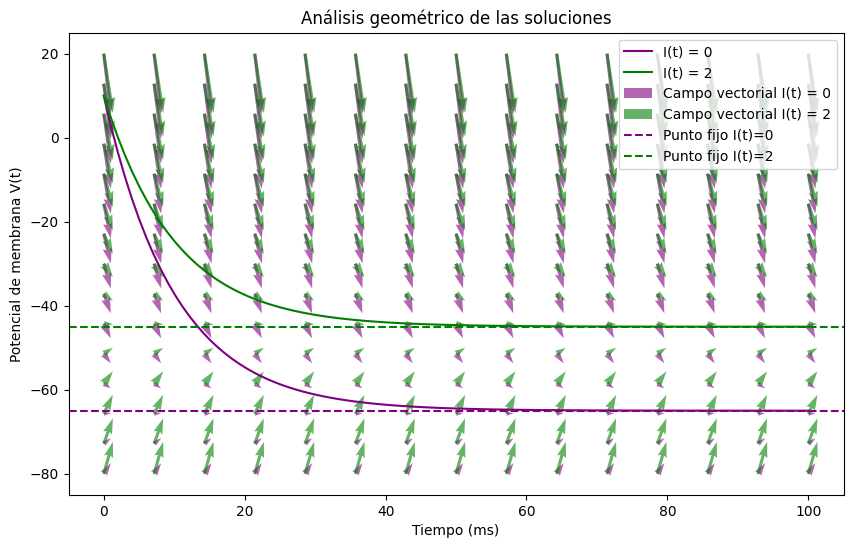

In [5]:
# Definición del campo vectorial
def dVdt(V, t, p):
    return 1/p[0] * (p[1] - V + p[2]*(p[3](t)))

# Puntos de interés en el espacio de fases (V, t)
V_values = np.linspace(-80, 20, 15)
t_values = np.linspace(interval[0], interval[1], 15)

T, V = np.meshgrid(t_values, V_values)

# Campo vectorial para I(t) = 0
I = lambda t: 0
p = [tao, E, R, I]

V_field = dVdt(V, T, p)

# Campo vectorial para I(t) = 2
I = lambda t: 2
p = [tao, E, R, I]

V_field_2 = dVdt(V, T, p)

# Gráficos
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Soluciones ya calculadas
ax.plot(np.linspace(interval[0], interval[1], len(solution_I0)), solution_I0, color='purple', label='I(t) = 0')
ax.plot(np.linspace(interval[0], interval[1], len(solution_I2)), solution_I2, color='green', label='I(t) = 2')

# Campo vectorial
ax.quiver(T, V, np.ones_like(V), V_field, color='purple', alpha=0.6, label='Campo vectorial I(t) = 0')
ax.quiver(T, V, np.ones_like(V), V_field_2, color='green', alpha=0.6, label='Campo vectorial I(t) = 2')

# Puntos fijos aproximados (agregados manualmente para referencia)
V_fixed_1 = E + R*0  # Para I(t) = 0
V_fixed_2 = E + R*2  # Para I(t) = 2
ax.axhline(V_fixed_1, color='purple', linestyle='--', label='Punto fijo I(t)=0')
ax.axhline(V_fixed_2, color='green', linestyle='--', label='Punto fijo I(t)=2')

ax.grid(False)
ax.legend()
ax.set_xlabel('Tiempo (ms)')
ax.set_ylabel('Potencial de membrana V(t)')
ax.set_title('Análisis geométrico de las soluciones')

plt.show()

Otro ejemplo con diferentes parametros

In [6]:
interval = [0, 200] #mili seconds
V_0 = E
I = lambda t: 2
h = 0.05 #mili seconds. Paso de integración

p = [tao, E, R, I]

solution_I2_1 = rk4(fun=fun,
                interval=interval,
                x_0=V_0,
                h=h,
                p=p)

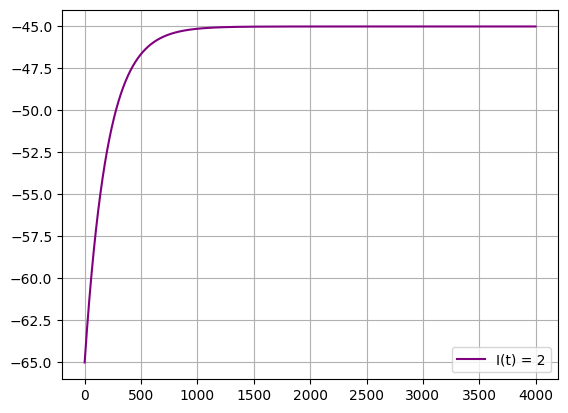

In [7]:
fig, ax = plt.subplots(1,1)

ax.plot(solution_I2_1, color='purple', label='I(t) = 2')

ax.grid()
ax.legend()
plt.show()

Mecanismo de disparo activado

In [8]:
V_u = -50

def fire_in_the_hole(x, t, p):
    if x <= V_u: return x
    else: return E 

p = [tao, E, R, I]

fire_solution = rk4(fun=fun,
                interval=interval,
                x_0=V_0,
                h=h,
                p=p,
                act_fcnt=fire_in_the_hole)

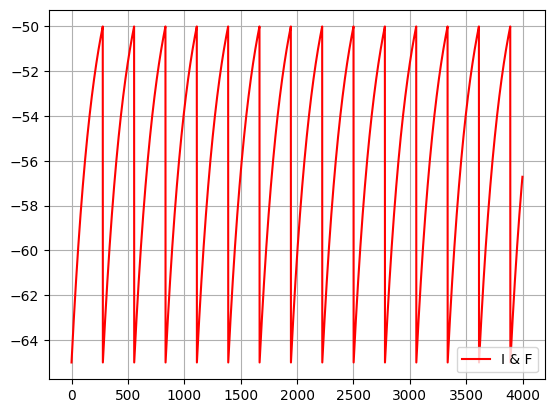

In [9]:
fig, ax = plt.subplots(1,1)

ax.plot(fire_solution, color='red', label='I & F')

ax.grid()
ax.legend()
plt.show()

Caso $I(t) = 2.5nA*cos(t/30ms)$

In [10]:
interval = [0, 500] #mili seconds
I0 = 2.5
I = lambda t: I0 * np.cos(t/30)

p = [tao, E, R, I]

fire_solution = rk4(fun=fun,
                interval=interval,
                x_0=V_0,
                h=h,
                p=p,
                act_fcnt=fire_in_the_hole)

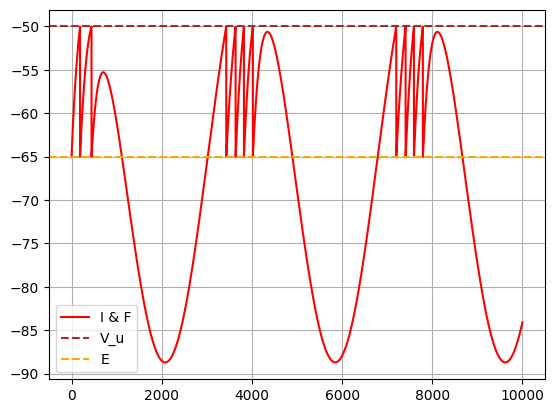

In [13]:
fig, ax = plt.subplots(1,1)

ax.plot(fire_solution, color='red', label='I & F')
ax.axhline(y=-50, color='brown', linestyle='--', label='V_u')
ax.axhline(y=-65, color='orange', linestyle='--', label='E')

ax.grid()
ax.legend()
plt.show()

Caso $
    I(t)= I_0 \, \left(
    \cos{\left( \frac{t}{3ms} \right)} +
    \sin{\left( \frac{t}{5ms} \right)} +
    \cos{\left( \frac{t}{7ms} \right)} +
    \sin{\left( \frac{t}{11ms} \right)} +
    \cos{\left( \frac{t}{13ms} \right)}  \right)^2 \, nA $

In [16]:
interval = [0, 200] #mili seconds
I0 = 0.35
I = lambda t: I0 * ((np.cos(t/3) + 
                    np.sin(t/5) +
                    np.cos(t/7) +
                    np.sin(t/11) +
                    np.cos(t/13))**2)

p = [tao, E, R, I]

fire_solution = rk4(fun=fun,
                interval=interval,
                x_0=V_0,
                h=h,
                p=p,
                act_fcnt=fire_in_the_hole)

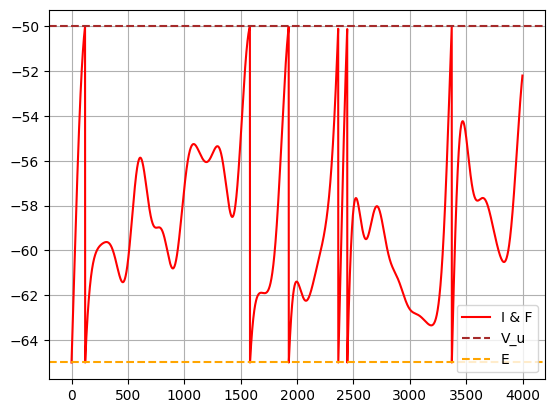

In [17]:
fig, ax = plt.subplots(1,1)

ax.plot(fire_solution, color='red', label='I & F')
ax.axhline(y=-50, color='brown', linestyle='--', label='V_u')
ax.axhline(y=-65, color='orange', linestyle='--', label='E')

ax.grid()
ax.legend()
plt.show()